# Import Packages and Define Functions

In [1]:
source("../data_lake_viz/data_lake_viz_functions.R")

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang
Registered S3 method overwritten by 'rvest':
  method            from
  read_xml.response xml2
── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 3.1.1       ✔ purrr   0.3.2  
✔ tibble  2.1.1       ✔ dplyr   0.8.0.1
✔ tidyr   0.8.3       ✔ stringr 1.4.0  
✔ readr   1.3.1       ✔ forcats 0.4.0  
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Attaching package: ‘gridExtra’

The following object is masked from ‘package:dplyr’:

    combine



In [2]:
mis_z_nobin <- import_nobin_data(fileString="../2018/aug/missense/mis_z/nobin/2018-09-19_exac_mis_z_Default_nobin_all.tsv")
mis_z_nobin_bgl <- import_nobin_data(fileString="../2018/aug/missense/mis_z/nobin/2018-09-19_exac_mis_z_Default_nobin_bgl.tsv")
mis_z_nobin_bgl$group_index = left_join(x=mis_z_nobin_bgl, y=mis_z_nobin, by="gene_symbol")$group_index.y

mis_z_nobin_cmg <- import_nobin_data(fileString="../2018/aug/missense/mis_z/nobin/2018-09-19_exac_mis_z_Default_nobin_cmg.tsv")
mis_z_nobin_cmg$group_index = left_join(x=mis_z_nobin_cmg, y=mis_z_nobin, by="gene_symbol")$group_index.y

mis_z_nobin_grouped_ratios <- group_nobin_data(nobin = mis_z_nobin)
mis_z_nobin_grouped_ratios_bgl <- group_nobin_data(nobin = mis_z_nobin_bgl)
mis_z_nobin_grouped_ratios_cmg <- group_nobin_data(nobin = mis_z_nobin_cmg)

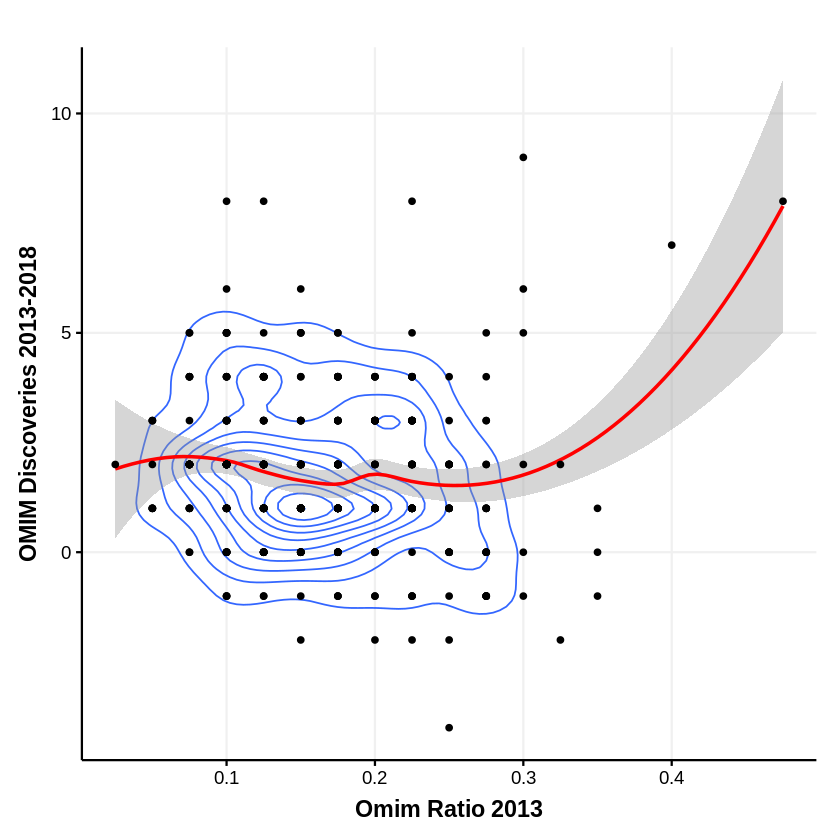

In [3]:
ggplot(data=mis_z_nobin_grouped_ratios, aes(x=ratio_2013, y=discoveries_2013to2018)) + geom_density_2d(bins=10) + geom_smooth(method="loess", color="red") + geom_point() + xlab("Omim Ratio 2013") + ylab("OMIM Discoveries 2013-2018") + theme_Publication()
# Or remove the most extreme outlier in the top-right quadrant (happens to be the gene list with the 40 highest mis_z scores)

In [4]:
# Fit 2016 + 2016 loess and lm (linear) models on all data
mis_z_nobin_grouped_ratios_bgl = fit_score_by_ratio_models(mis_z_nobin_grouped_ratios_bgl)
mis_z_nobin_grouped_ratios_cmg = fit_score_by_ratio_models(mis_z_nobin_grouped_ratios_cmg)
mis_z_nobin_grouped_ratios = fit_score_by_ratio_models(mis_z_nobin_grouped_ratios)

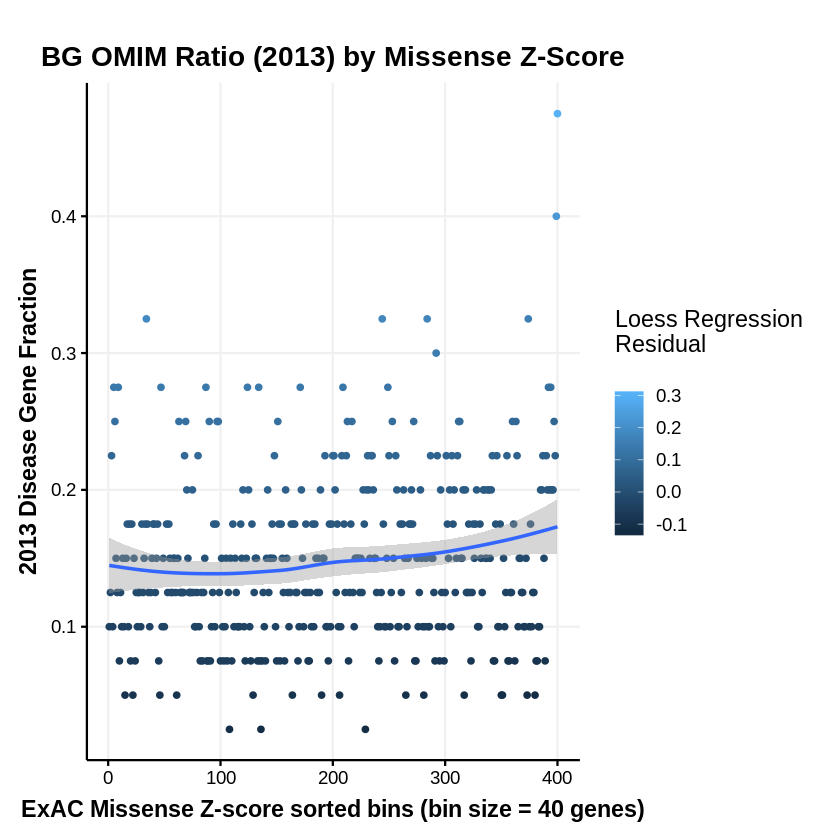

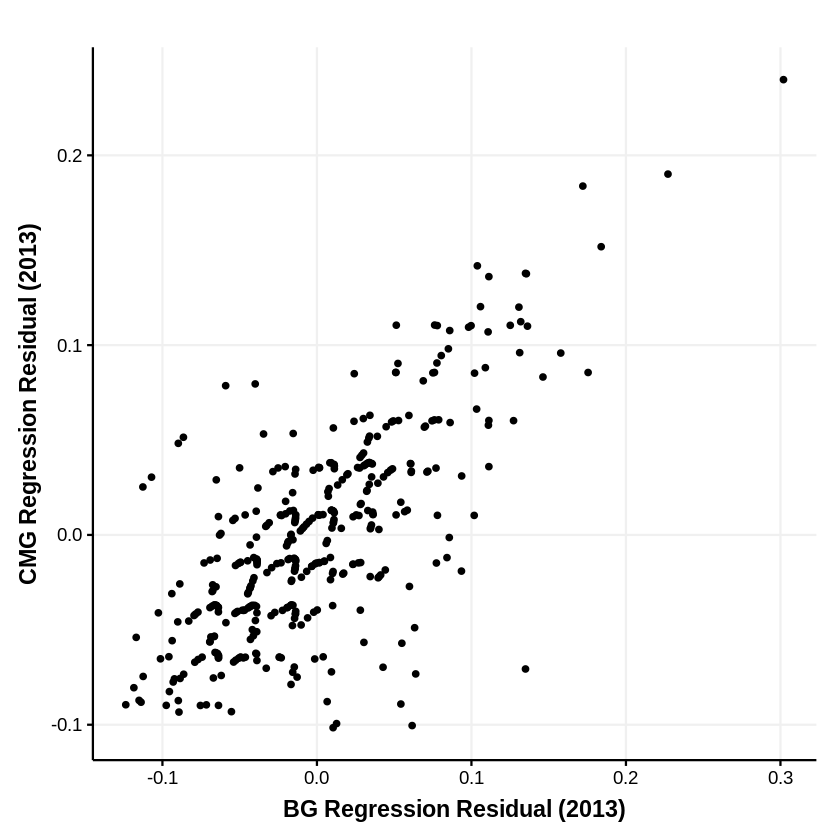

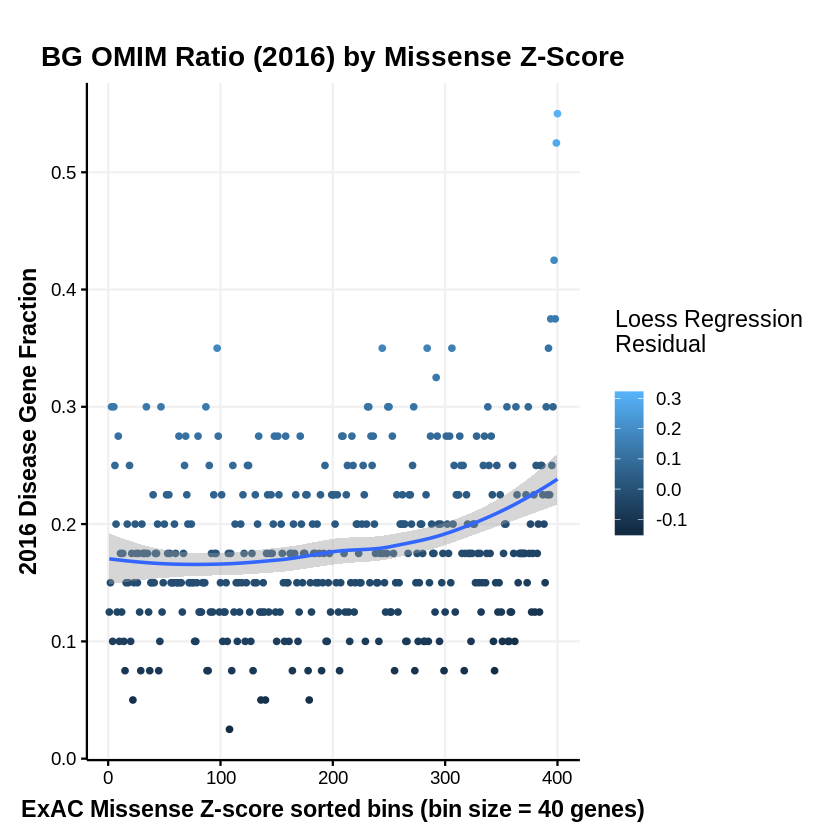

In [5]:
ggplot(mis_z_nobin_grouped_ratios_bgl, aes(group_index, ratio_2013)) + ggtitle("BG OMIM Ratio (2013) by Missense Z-Score") + geom_point(aes(color=residual_2013_loess)) + geom_smooth(method="loess", span=1) + ylab("2013 Disease Gene Fraction") + xlab("ExAC Missense Z-score sorted bins (bin size = 40 genes)") + scale_color_continuous(name="Loess Regression\nResidual\n") + theme_Publication_legendright()
residuals_df = mis_z_nobin_grouped_ratios_bgl %>% select(group_index, residual_2013_loess) %>% inner_join(mis_z_nobin_grouped_ratios_cmg %>% select(group_index, residual_2013_loess), by="group_index")
names(residuals_df)[names(residuals_df)=="residual_2013_loess.x"] <- "BGL_2013_residual"
names(residuals_df)[names(residuals_df)=="residual_2013_loess.y"] <- "CMG_2013_residual"
ggplot(data=residuals_df) + ylab("CMG Regression Residual (2013)") + xlab("BG Regression Residual (2013)") + geom_point(aes(x=BGL_2013_residual, y=CMG_2013_residual)) + theme_Publication_legendright()

ggplot(mis_z_nobin_grouped_ratios_bgl, aes(group_index, ratio_2016)) + ggtitle("BG OMIM Ratio (2016) by Missense Z-Score") + geom_point(aes(color=residual_2016_loess)) + geom_smooth(method="loess", span=1) + ylab("2016 Disease Gene Fraction") + xlab("ExAC Missense Z-score sorted bins (bin size = 40 genes)") + scale_color_continuous(name="Loess Regression\nResidual\n") + theme_Publication_legendright()

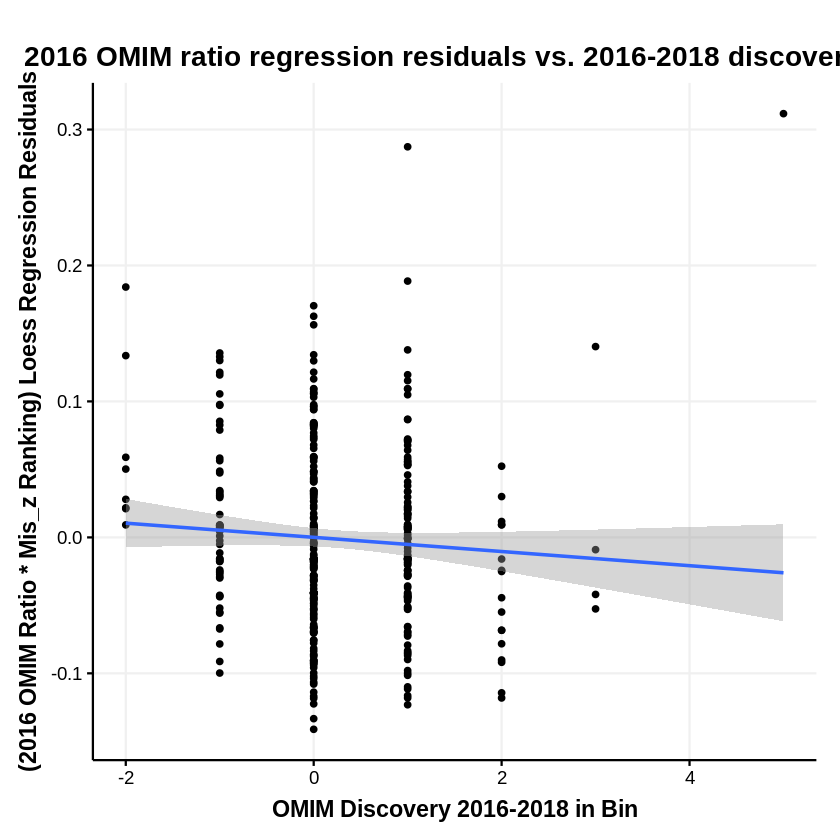

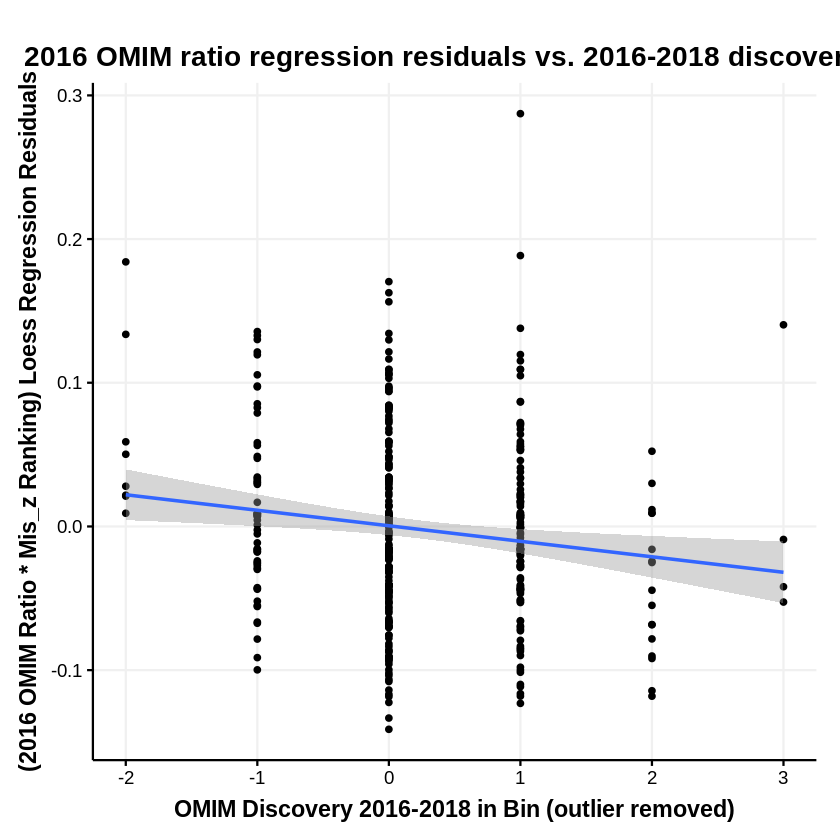

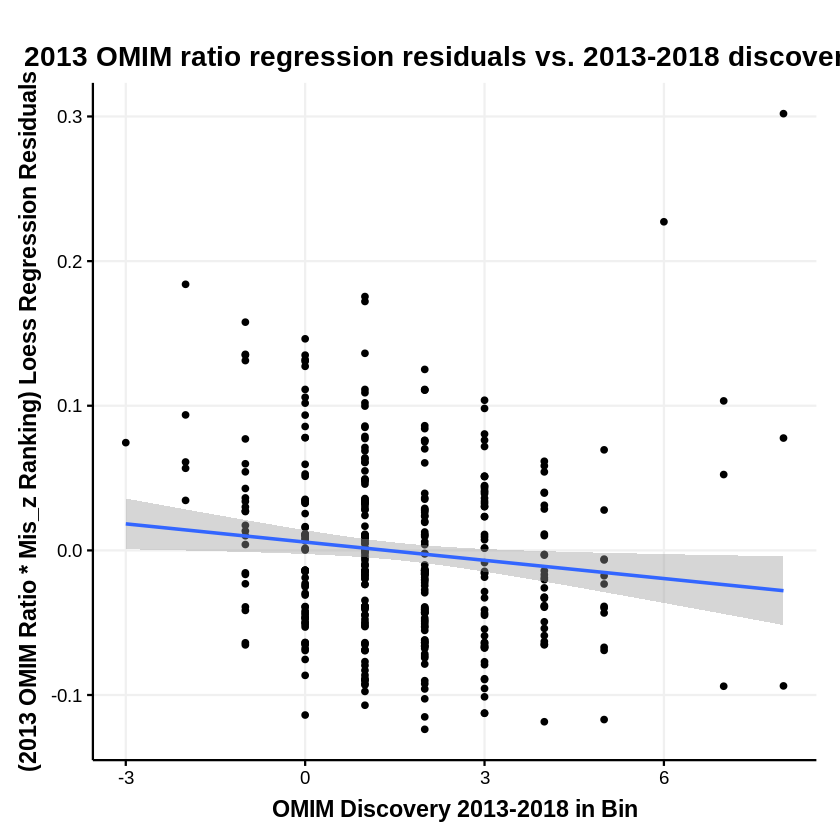

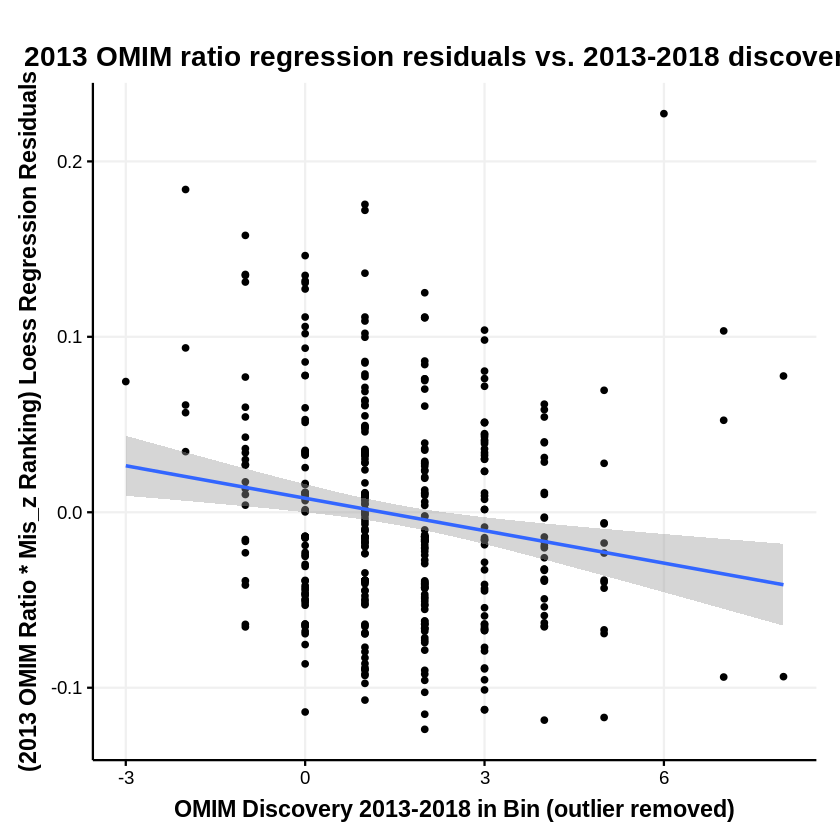

In [6]:
ggplot(mis_z_nobin_grouped_ratios_bgl, aes(discoveries_2016to2018, residual_2016_loess)) + geom_point() + geom_smooth(method="lm") + ggtitle("2016 OMIM ratio regression residuals vs. 2016-2018 discoveries") + xlab("OMIM Discovery 2016-2018 in Bin") + ylab("(2016 OMIM Ratio * Mis_z Ranking) Loess Regression Residuals") + theme_Publication()
ggplot(filter(mis_z_nobin_grouped_ratios_bgl, group_index<400), aes(discoveries_2016to2018, residual_2016_loess)) + geom_point() + geom_smooth(method="lm") + ggtitle("2016 OMIM ratio regression residuals vs. 2016-2018 discoveries") + xlab("OMIM Discovery 2016-2018 in Bin (outlier removed)") + ylab("(2016 OMIM Ratio * Mis_z Ranking) Loess Regression Residuals") + theme_Publication()

ggplot(mis_z_nobin_grouped_ratios_bgl, aes(discoveries_2013to2018, residual_2013_loess)) + geom_point() + geom_smooth(method="lm") + ggtitle("2013 OMIM ratio regression residuals vs. 2013-2018 discoveries") + xlab("OMIM Discovery 2013-2018 in Bin") + ylab("(2013 OMIM Ratio * Mis_z Ranking) Loess Regression Residuals") + theme_Publication()
ggplot(filter(mis_z_nobin_grouped_ratios_bgl, group_index<400), aes(discoveries_2013to2018, residual_2013_loess)) + geom_point() + geom_smooth(method="lm") + ggtitle("2013 OMIM ratio regression residuals vs. 2013-2018 discoveries") + xlab("OMIM Discovery 2013-2018 in Bin (outlier removed)") + ylab("(2013 OMIM Ratio * Mis_z Ranking) Loess Regression Residuals") + theme_Publication()

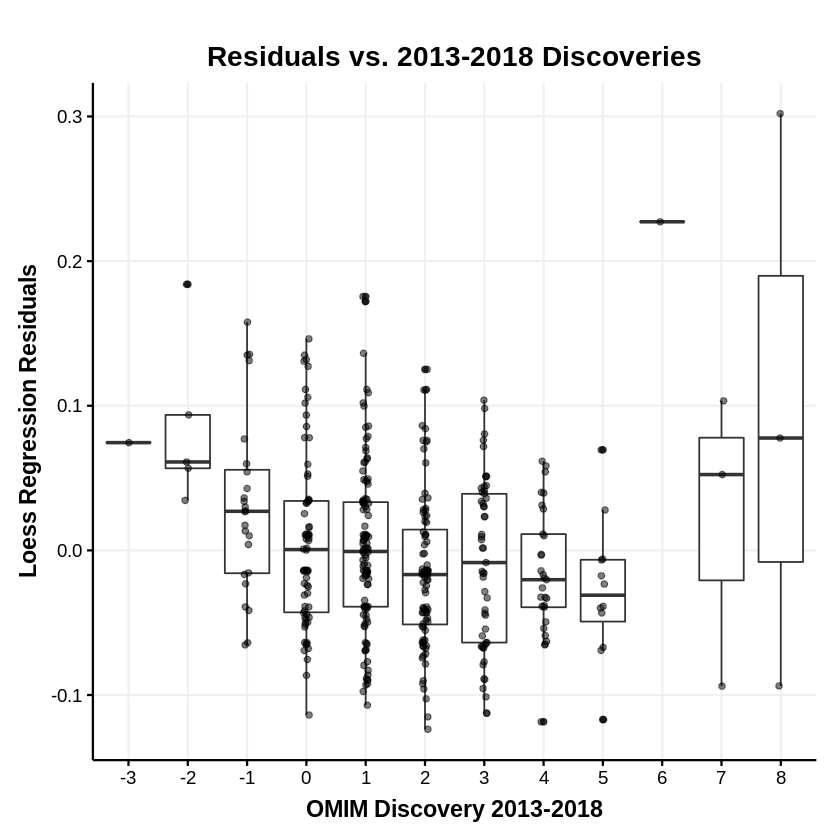

In [7]:
ggplot(mis_z_nobin_grouped_ratios_bgl, aes(as.factor(discoveries_2013to2018), residual_2013_loess)) + geom_boxplot() + ggtitle("Residuals vs. 2013-2018 Discoveries")+ xlab("OMIM Discovery 2013-2018")  + ylab("Loess Regression Residuals") + geom_jitter(alpha=0.5, width=0.05) + theme_Publication()

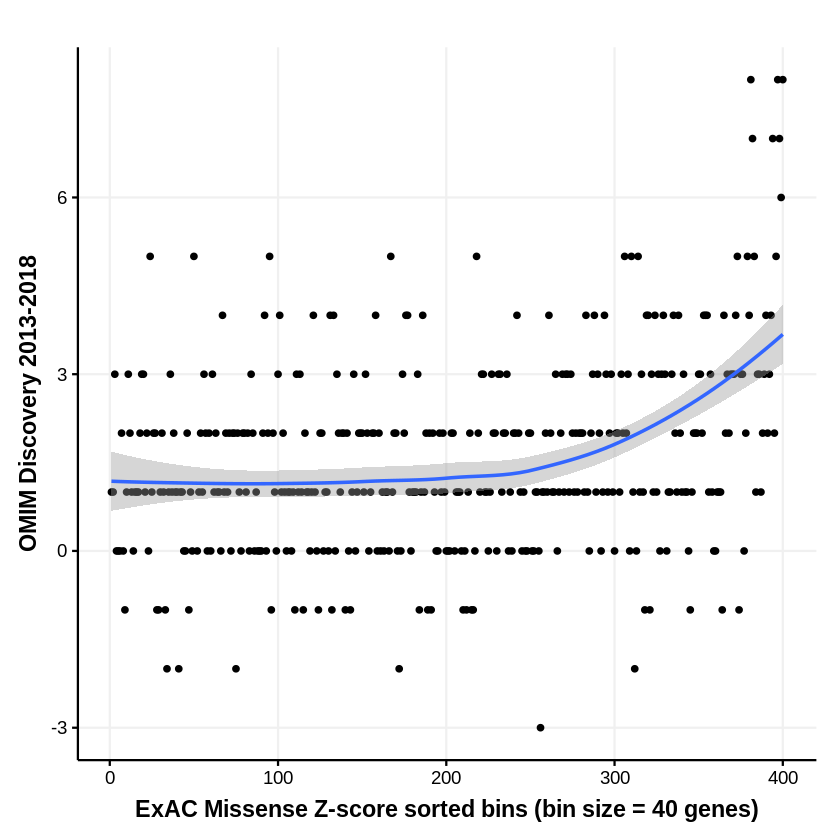

In [8]:
ggplot(mis_z_nobin_grouped_ratios_bgl, aes(group_index, discoveries_2013to2018)) + geom_point() + geom_smooth(method="loess", span=1) + scale_fill_brewer(palette = "Paired") + ylab("OMIM Discovery 2013-2018") + xlab("ExAC Missense Z-score sorted bins (bin size = 40 genes)") + theme_Publication()

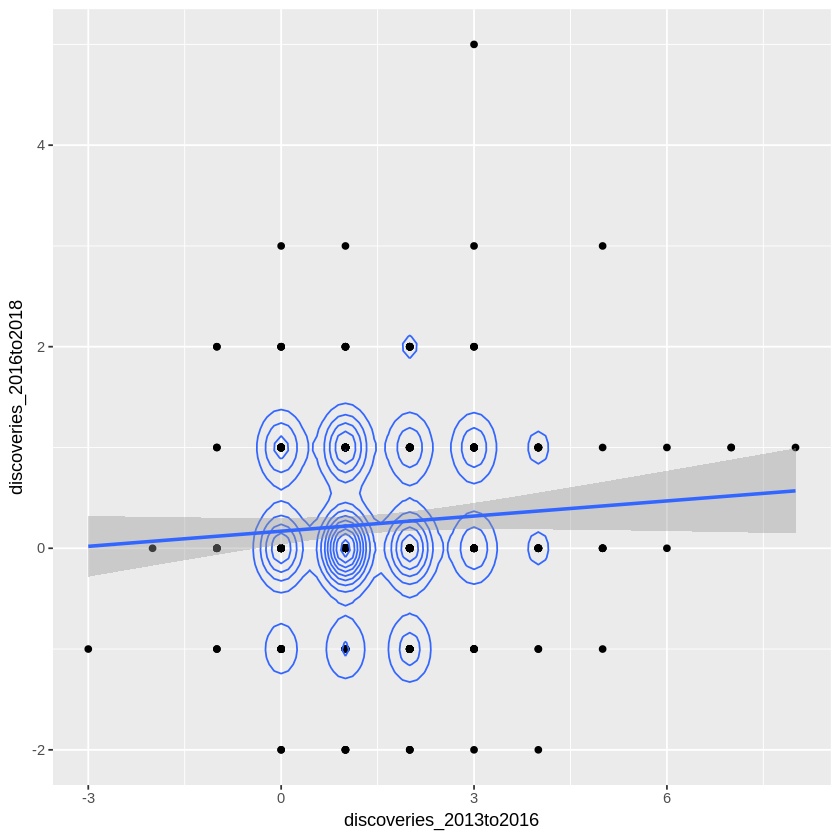

In [9]:
 ggplot(mis_z_nobin_grouped_ratios, aes(x=discoveries_2013to2016, y=discoveries_2016to2018)) + geom_point() + geom_density_2d() + geom_smooth(method="lm")

In [10]:
predict_discoveries = lm(discoveries_2016to2018 ~ residual_2013_loess + residual_2014_loess + residual_2016_loess + residual_2013_loess:residual_2014_loess:residual_2016_loess + discoveries_2013to2016, data=mis_z_nobin_grouped_ratios_bgl)

summary(predict_discoveries)


Call:
lm(formula = discoveries_2016to2018 ~ residual_2013_loess + residual_2014_loess + 
    residual_2016_loess + residual_2013_loess:residual_2014_loess:residual_2016_loess + 
    discoveries_2013to2016, data = mis_z_nobin_grouped_ratios_bgl)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.12272 -0.41633 -0.06083  0.68978  2.86806 

Coefficients:
                                                            Estimate Std. Error
(Intercept)                                                  -0.5595     0.1451
residual_2013_loess                                          20.4065     4.5580
residual_2014_loess                                           2.0537     2.6527
residual_2016_loess                                         -25.8525     4.5408
discoveries_2013to2016                                        0.5697     0.1030
residual_2013_loess:residual_2014_loess:residual_2016_loess 134.7686    28.3030
                                                            t value Pr(>|t|

[1] "numeric"

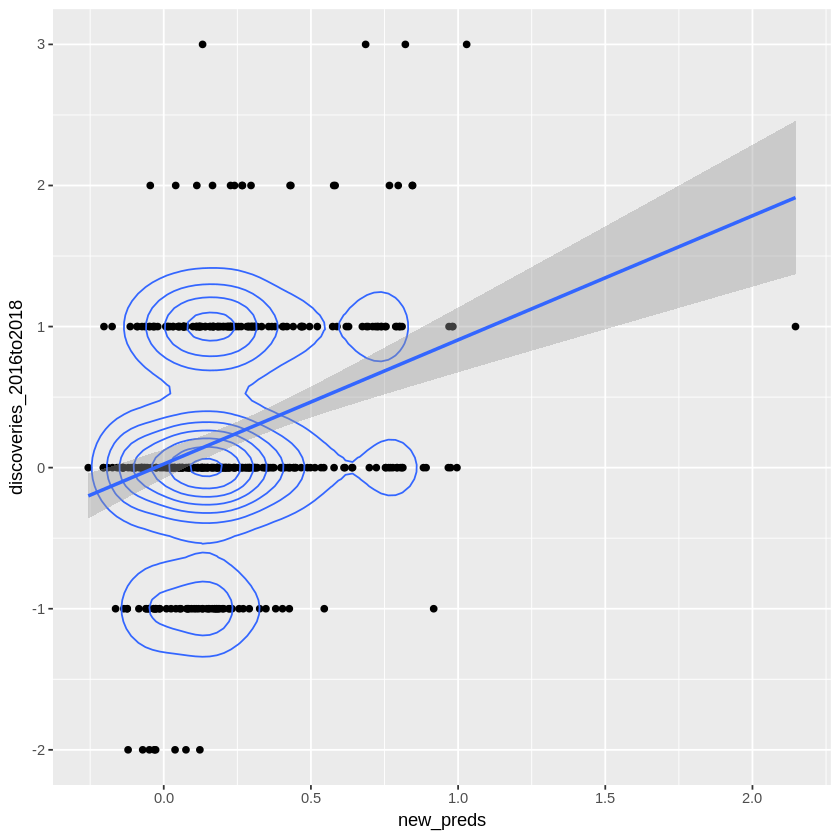

In [11]:
class(predict(predict_discoveries, new_data=mis_z_nobin_grouped_ratios_cmg))
new_preds = predict(predict_discoveries, new_data=mis_z_nobin_grouped_ratios_cmg)[predict(predict_discoveries, new_data=mis_z_nobin_grouped_ratios_cmg)<3.5]
ggplot(data=filter(mis_z_nobin_grouped_ratios_bgl, discoveries_2016to2018<3.5), aes(x=new_preds, y=discoveries_2016to2018)) + geom_point() + geom_density_2d() + geom_smooth(method="lm")

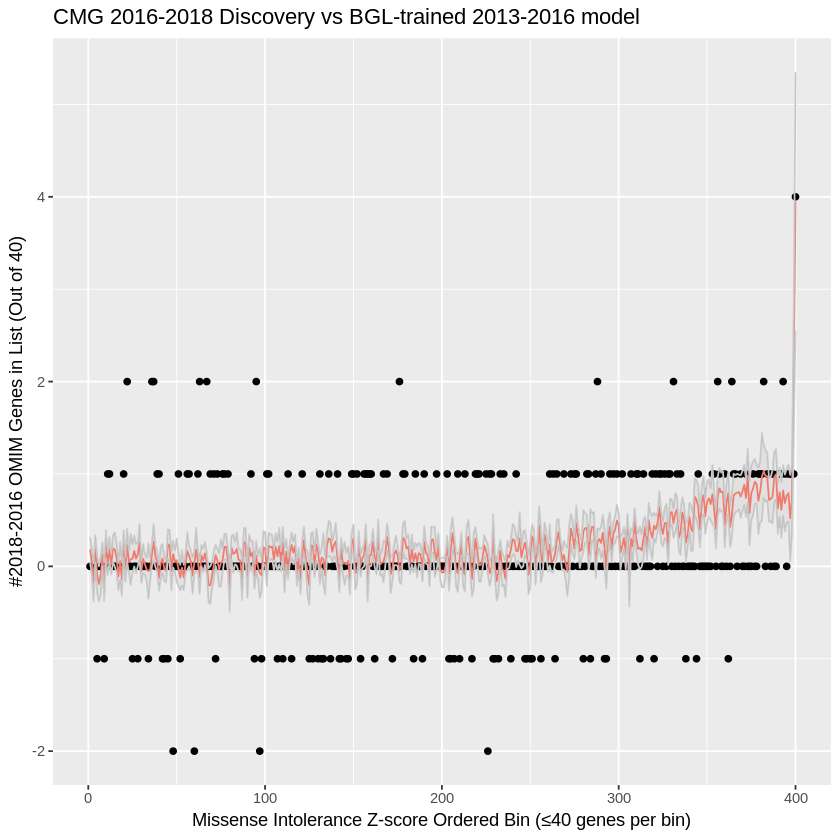

In [12]:
# Plot the 2016 regression model on top of group index vs CMG discoveries
mp <- as.data.frame(cbind(group_index = mis_z_nobin_grouped_ratios_bgl$group_index, predict(predict_discoveries, interval = 'confidence')))
# Base plot
p1 <- ggplot(mis_z_nobin_grouped_ratios_cmg, aes(x = group_index, y = discoveries_2016to2018)) + geom_point()
# Add the fitted model + confidence envelope
p1 <- p1 + geom_line(data = mp, aes(x = group_index, y = fit), color = 'salmon') + geom_line(data = mp, aes(x = group_index, y = lwr), color = 'gray80') + geom_line(data = mp, aes(x = group_index, y = upr), color = 'gray80') 
p1 <- p1 + geom_ribbon(data = mp, aes(x = group_index, ymin = lwr, ymax = upr, y=fit), alpha = 0.05)
p1 <- p1 + xlim(000, 400)
p1 <- p1 + xlab("Missense Intolerance Z-score Ordered Bin (≤40 genes per bin)")
p1 <- p1 + ylab("#2018-2016 OMIM Genes in List (Out of 40)")
p1 <- p1 + ggtitle("CMG 2016-2018 Discovery vs BGL-trained 2013-2016 model")
p1